
# Saranya 300321456 - Assignment 2 - Evaluation of Learning


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as bsns


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.pipeline import Pipeline, make_pipeline 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
KFold
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.preprocessing import MinMaxScaler


In [3]:

# import libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
def category_to_number(X, to_one_hot = [], to_ordinal =[]):
    '''
    Input:  X - original dataset
            to_one_hot - the columns that need to be One hot encoded
            to_ordinal  - the columns that need to be oridinal encoded
    
    Output: X - after all the processing done
    
    Function to change the categorical variables present in the dataset to encoded numericals   
    
    '''
    OHen = OneHotEncoder()
    Oren = OrdinalEncoder()
    n = X.shape[1]
    # looping through the columns and encodering the categorical column     
    for i in range(n):
        
        # One hot encoding for cardinal columns
        if not to_one_hot:
            if X.iloc[:,i].name in to_one_hot:
                OHE = OHen.fit_transform(X.iloc[:,[i]])
                df = pd.DataFrame(OHE.toarray(),columns=[X.iloc[:,i].name+"_"+y for y in X.iloc[:,i].unique()])
                X = pd.merge(left=X,right=df,left_index=True,right_index=True)
        
        # Ordinal encoding for ordinal columns
        if X.iloc[:,i].name in to_ordinal:
            X.loc[:,X.iloc[:,i].name] = Oren.fit_transform(X.iloc[:,[i]])
    
    # Dropping the cardinal categorical columns to avoind redundancy  
    X.drop(columns=to_one_hot,inplace = True)
    return X

In [5]:
def Feature_selection(X,y):
    noOfFeaturesSelected = 8
    from sklearn.feature_selection import SelectKBest , f_classif
    selector = SelectKBest(f_classif, k=noOfFeaturesSelected)
    selector.fit(X,y) 
    selector.scores_

    # Significant Features for Alcohol
    cols = selector.get_support(indices=True)    
    return cols

In [6]:
    DT__params = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
    
    SVC__params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']} 
    
    RF__params = { 
              'n_estimators': [200, 700],
              'max_features': ['auto', 'sqrt', 'log2']
                }
    k_range = list(range(1, 31))
    KNN__Params = dict(n_neighbors=k_range)
    
    MLP__params = {
            'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
                }
    GB__params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [7]:
 # define the model
from sklearn.tree import DecisionTreeClassifier
models = []
models.append(('SVM',SVC__params,SVC(kernel='linear',random_state=4)))
models.append(('DT',DT__params,DecisionTreeClassifier()))
models.append(('RF',RF__params,RandomForestClassifier(n_estimators=40)))
models.append(('KNN',KNN__Params,KNeighborsClassifier(n_neighbors=4)))
models.append(('MLP',MLP__params,MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(256,128,64,32), activation="relu", random_state=1)))
models.append(('GB',GB__params,GradientBoostingClassifier(random_state=42)))

# VSA - Dataset with Highest prediction 

1) Load Data set
2) Feature Scaling
3) Feature Selecton

In [8]:
# create the dataset
def get_dataset():
    # DF -- VSA
    path = 'C:/Users/VaishuSistas/Desktop/ML/Assignments/Assignment1/Data/Assignment1_drug_consumption.txt'
    dfmainVSA  = pd.read_csv(path,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,31]) 
    dfmainVSA.columns = ['Age','Gender','Education','Country','Ethnicity',
                         'NScore','Escore','OScore','AScore','CScore',
                         'Impulse','SS','DrugClass'] 
    dfmainVSA['DrugClass'] = dfmainVSA ['DrugClass'].apply(lambda x: '0' if (x == 'CL1' or x == 'CL0') else '1')
    dfmainVSA.head(20)
    dfmainVSA.groupby('DrugClass').mean()

    X = dfmainVSA[dfmainVSA.columns[~dfmainVSA.columns.isin(['DrugClass'])]]
    y = dfmainVSA['DrugClass']
    dfmainVSA.groupby(['DrugClass'])['DrugClass'].count()
    # Feature Scaling - Drug DS
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
    X = pd.DataFrame(scaler.transform(X)) 
    
    # Feature selection
    cols = Feature_selection(X,y)
    X = X.iloc[:,cols]
    
    return X, y

In [9]:
# Importing Labour negotiations dataset
def Get_Labordataset():
    import warnings
    warnings.filterwarnings("ignore")

    from sklearn.impute import SimpleImputer
    labour_data_1 = pd.read_csv("LabourDataset/labor-neg.data",na_values="?")
    labour_data_2 =pd.read_csv("LabourDataset/labor-neg.test",na_values="?")
    labour_data = labour_data_1.append(labour_data_2, ignore_index = True)

    # Features split and output class target variable
    labour_X = labour_data.iloc[:,:-1]
    labour_y = labour_data.iloc[:,-1]

    # Checking missing values in dataset
    #print((np.sum(labour_X.isnull(),axis=0)))

    # Dropping columns with missing values more than 20
    labour_X.dropna(axis=1,thresh=labour_X.shape[0] - 20,inplace=True)


    # Imputing missing values in numerical columns
    num_imputer=SimpleImputer(strategy="mean")
    labour_X.loc[:,labour_X.dtypes == "float64"] = num_imputer.fit_transform(labour_X.loc[:,labour_X.dtypes == "float64"])

    # Imputing missing values in categorical columns
    cat_imputer = SimpleImputer(strategy="most_frequent")
    labour_X.loc[:,labour_X.dtypes == "object"] = cat_imputer.fit_transform(labour_X.loc[:,labour_X.dtypes == "object"])

    # converting categorival variables to numerical variables
    column_names=labour_X.loc[:,labour_X.dtypes == "object"].columns

    labour_X = category_to_number(labour_X,to_ordinal=column_names)
    
    # Feature Scaling
        
    Scaler_1 = MinMaxScaler(feature_range=(0, 1)).fit(labour_X)
    labour_X = pd.DataFrame(Scaler_1.transform(labour_X)) 
    
    # Feature Selection
     
    cols = Feature_selection(labour_X,labour_y)
    labour_X = labour_X.iloc[:,cols]
        
    return labour_X, labour_y

In [10]:
# Importing Labour negotiations dataset
def Get_HeartDataset():
    import warnings
    warnings.filterwarnings("ignore")

    from sklearn.impute import SimpleImputer
    # Importing Heart disease dataset
    Heart_dataset = pd.read_csv("HeartDisease/heart_cleveland_upload.csv",sep=",")
    # Features split and output class target variable
    heart_X = Heart_dataset.iloc[:,:-1]
    heart_y = Heart_dataset.iloc[:,-1] 
 
    # Checking missing values in dataset
    #print((np.sum(heart_X.isnull(),axis=0)))

    # Dropping columns with missing values more than 20
    heart_X.dropna(axis=1,thresh=heart_X.shape[0] - 20,inplace=True)

    # Imputing missing values in numerical columns
    num_imputer=SimpleImputer(strategy="mean")
    heart_X.loc[:,heart_X.dtypes == "float64"] = num_imputer.fit_transform(heart_X.loc[:,heart_X.dtypes == "float64"])

    # Imputing missing values in categorical columns
    #cat_imputer = SimpleImputer(strategy="most_frequent")
    #heart_X.loc[:,heart_X.dtypes == "object"] = cat_imputer.fit_transform(heart_X.loc[:,heart_X.dtypes == "object"])

    # converting categorival variables to numerical variables
    column_names=heart_X.loc[:,heart_X.dtypes == "object"].columns
   
    heart_X = category_to_number(heart_X,to_ordinal=column_names)    
    
    # Feature Scaling
    
    Scaler_2 = MinMaxScaler(feature_range=(0, 1)).fit(heart_X)
    heart_X = pd.DataFrame(Scaler_2.transform(heart_X)) 
    
    # Feature Selection
     
    cols = Feature_selection(heart_X,heart_y)
    heart_X = heart_X.iloc[:,cols]
    
    return heart_X, heart_y

In [11]:
# configure the cross-validation procedure With Over and under sampling confgured
def Cross_Validation(X,y,ToDoOversample = 0, ToDoUnderSample = 0,datasetName=''):
        from imblearn.over_sampling import SMOTE
        from imblearn.under_sampling import RandomUnderSampler
        cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
        # enumerate splits
        outer_results = list()

        import warnings
        warnings.filterwarnings("ignore")
        CrossValResults = [] 
        for train_index, test_index in cv_outer.split(X):
            # split data
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            # configure the cross-validation procedure
            cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)

            # define search space
            Dataset = []  
            ModelNames = []
            for name,params,model in models:        
                # define search
                #print('InsideLoop')
                search = GridSearchCV(model, params, scoring='accuracy', cv=cv_inner, refit=True)
                if ToDoOversample == 1:
                    #print('InsideLoop1')
                    # SMOTE OVER SAMPLING
                    sm = SMOTE()
                    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
                    X_train = X_train_oversampled
                    y_train = y_train_oversampled

                if ToDoUnderSample ==1:  
                    #print('InsideLoop2')
                    # Random Under Sampling
                    rus = RandomUnderSampler(sampling_strategy="not minority")
                    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
                    X_train = X_train_undersampled
                    y_train = y_train_undersampled

                # execute search
                #print('Execute Search')
                result = search.fit(X_train, y_train)
                # get the best performing model fit on the whole training set
                best_model = result.best_estimator_
                # evaluate model on the hold out dataset
                Ypr = best_model.predict(X_test)
                # evaluate the model
                acc = accuracy_score(y_test, Ypr)
                # store the result
                outer_results.append(acc)
                # report progress
                # print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
                ModelNames.append(name)
                CrossValResults.append(acc)
                Dataset.append(datasetName)
        # summarize the estimated performance of the model
        # print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

        #print('Before For Loop')
        for i in range(len(ModelNames)):
            print(ModelNames[i],CrossValResults[i].mean() , Dataset[i])

        return ModelNames,CrossValResults

### Hyper Parameter Tuning for the Models

### K Fold Cross Validation

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
kfold_validation=  KFold(n_splits=10, random_state=42, shuffle=True)

### Hyper parameter Tuning Configurations Parameters for 6 Models 

In [138]:
X,y  = get_dataset()
Labor_X,Labor_y = Get_Labordataset()
Heart_X,Heart_y = Get_HeartDataset()

### Drug data Set - Cross Validation - Experiment A

In [123]:
DrugDS_CV_Scores = [] 
DrugDS_CV_Scores = Cross_Validation(X,y,0,0)

Before For Loop
SVM 0.8941798941798942 Drug Dataset CV
DT 0.8941798941798942 Drug Dataset CV
RF 0.8835978835978836 Drug Dataset CV
KNN 0.8941798941798942 Drug Dataset CV


### Drug data Set - Over Sampling - Experiment B

In [139]:
DrugDS_OvrSample_Scores = []
DrugDS_OvrSample_Scores   = Cross_Validation(X,y,1,0)

Before For Loop
SVM 0.7301587301587301 Drug Dataset CV
DT 0.7883597883597884 Drug Dataset CV
RF 0.8677248677248677 Drug Dataset CV
KNN 0.7724867724867724 Drug Dataset CV


### Drug data Set - Under Sampling - Experiment C

In [146]:
DrugDS_UnderSample_Scores = []
DrugDS_UnderSample_Scores = Cross_Validation(X,y,0,1)

Before For Loop
SVM 0.656084656084656 Drug Dataset CV
DT 0.7513227513227513 Drug Dataset CV
RF 0.7354497354497355 Drug Dataset CV
KNN 0.6613756613756614 Drug Dataset CV


#### Labor Relations Data set - Cross Validation

In [147]:
Labor_CV_Scores = [] 
Labor_CV_Scores = Cross_Validation(Labor_X,Labor_y,0,0)

Before For Loop
SVM 0.8333333333333334 Drug Dataset CV
DT 0.8333333333333334 Drug Dataset CV
RF 0.8333333333333334 Drug Dataset CV
KNN 0.8333333333333334 Drug Dataset CV


#### Labor Data set - Over Sampling

In [148]:
LaborDS_OvrSample_Scores = []
LaborDS_OvrSample_Scores = Cross_Validation(Labor_X,Labor_y,1,0)

Before For Loop
SVM 0.8333333333333334 Drug Dataset CV
DT 0.8333333333333334 Drug Dataset CV
RF 0.8333333333333334 Drug Dataset CV
KNN 0.5 Drug Dataset CV


In [160]:
print(LaborDS_OvrSample_Scores[0][0],LaborDS_OvrSample_Scores[0][1],LaborDS_OvrSample_Scores[0][2])

SVM DT RF


#### Labor Data set - Under Sampling

In [149]:
LaborDS_UnderSample_Scores = []
LaborDS_UnderSample_Scores = Cross_Validation(Labor_X,Labor_y,0,1)

Before For Loop
SVM 1.0 Drug Dataset CV
DT 1.0 Drug Dataset CV
RF 1.0 Drug Dataset CV
KNN 0.8333333333333334 Drug Dataset CV


#### Heart Disease Data set - CV

In [150]:
Heart_CV_Scores = []
Heart_CV_Scores = Cross_Validation(Heart_X,Heart_y,0,0)

Before For Loop
SVM 0.7666666666666667 Drug Dataset CV
DT 0.7333333333333333 Drug Dataset CV
RF 0.7333333333333333 Drug Dataset CV
KNN 0.7 Drug Dataset CV


#### Heart Disease Data set - Over Sampled

In [151]:
Heart_OvrSample_Scores = []
Heart_OvrSample_Scores = Cross_Validation(Heart_X,Heart_y,1,0)

Before For Loop
SVM 0.7 Drug Dataset CV
DT 0.7333333333333333 Drug Dataset CV
RF 0.7666666666666667 Drug Dataset CV
KNN 0.7333333333333333 Drug Dataset CV


#### Heart Disease Data set - Under Sampled

In [152]:
Heart_UnderSample_Scores = []
Heart_UnderSample_Scores = Cross_Validation(Heart_X,Heart_y,0,1)

Before For Loop
SVM 0.7333333333333333 Drug Dataset CV
DT 0.6666666666666666 Drug Dataset CV
RF 0.7666666666666667 Drug Dataset CV
KNN 0.7333333333333333 Drug Dataset CV


#### Table showing Average of Accuracies

In [23]:
# Creating index for the Table
Datasets = ["Drug Dataset","Drug Dataset - OS","Drug Dataset - US" ,"Labor CV DS", "Heart CV DS"]

Algorithms =["SVM", "DT", "RF", "KNN" , "MLP" , "GB"]
pairs = ((key,value)  for key in Datasets for value in Algorithms)
Multi_columns=pd.MultiIndex.from_tuples([*pairs])

# Merging results and obtaing data
Kflod_data =np.c_[[DrugDS_CV_Scores[0][1],
                  DrugDS_CV_Scores[1][1],
                  DrugDS_CV_Scores[2][1],
                  DrugDS_CV_Scores[3][1],
                  DrugDS_CV_Scores[4][1],
                  DrugDS_CV_Scores[5][1],
                   
                   
                  DrugDS_OvrSample_Scores[0][1],
                  DrugDS_OvrSample_Scores[1][1],
                  DrugDS_OvrSample_Scores[2][1],
                  DrugDS_OvrSample_Scores[3][1],
                  DrugDS_OvrSample_Scores[4][1],
                  DrugDS_OvrSample_Scores[5][1],
                  
                  DrugDS_UnderSample_Scores[0][1],
                  DrugDS_UnderSample_Scores[1][1],
                  DrugDS_UnderSample_Scores[2][1],
                  DrugDS_UnderSample_Scores[3][1], 
                  DrugDS_UnderSample_Scores[4][1],
                  DrugDS_UnderSample_Scores[5][1],
                   
                  Labor_CV_Scores[0][1],
                  Labor_CV_Scores[1][1],
                  Labor_CV_Scores[2][1],
                  Labor_CV_Scores[3][1], 
                  Labor_CV_Scores[4][1],  
                  Labor_CV_Scores[5][1],  
              
                  
                  Heart_CV_Scores[0][1],
                  Heart_CV_Scores[1][1],
                  Heart_CV_Scores[2][1],
                  Heart_CV_Scores[3][1],
                  Heart_CV_Scores[4][1],
                  Heart_CV_Scores[5][1]]
                  ]

Kflod_data
# Creating final table
 
DataSet_Algorithms_AccuracyTable = pd.DataFrame(data=Kflod_data.reshape((5,6)),columns=Algorithms,index = Datasets)

In [24]:
DataSet_Algorithms_AccuracyTable 

,SVM,DT,RF,KNN,MLP,GB
Drug Dataset,0.894,0.894,0.884,0.894,0.894,0.894
Drug Dataset - OS,0.73,0.788,0.8677,0.772,0.772,0.894
Drug Dataset - US,0.656,0.751,0.735,0.661,0.719,0.894
Labor CV DS,0.833,0.833,0.833,0.833,0.833,0.833
Heart CV DS,0.766,0.733,0.733,0.7,0.833,0.833


## Labor dataset
The Labor and Heart data set was subjected to OVer sampling and Under sampling.
The Labor Data set is having better accuracies with just cross validation. Under sampling has significantly overfitted the data
And with labor data set the Over sampling  has similar accuracies as normal cross validation which is not quite significant.
## Heart dataset
Heart dataset is subjected to cross validation, under and over sampling. 
The heart dataset accuracy was reduced for Decision tree with under sampling and other models performed better with under sampling
The heart dataset does not have significant performance improvement with Under or over sampling. So we retain the Heart data set with just cross validation


#### Statistical significant differences between the results using Friedman’s test

In [45]:
def FncFriedmanTest(Dataset,names):
    
    n,k=Dataset.shape
    
    Rank_table = Dataset.rank(axis=1,method="max",ascending=False)
    avg_ranks=np.mean(Rank_table,axis=0)
    
    R_d = sum((avg_ranks*n))/(n*k)
    ssd1 = n * sum((avg_ranks - R_d)**2)
    ssd2 = sum(np.sum((Rank_table-R_d)**2).values)/(n*(k-1))
    
    F_stat = ssd1/ssd2 
    
    return F_stat,avg_ranks

In [49]:
FriedmanStatistic_value,rankAvg = FncFriedmanTest(Dataset= DataSet_Algorithms_AccuracyTable  ,names=Algorithms)

In [50]:
print("The Friedman's Statistic p value obtained: {}".format(FriedmanStatistic_value))

print("The Average ranks from Friedman's Test:\n")
print(rankAvg)

The Friedman's Statistic p value obtained: 5.581728799672265
The Average ranks from Friedman's Test:

SVM    5.2
DT     4.2
RF     4.4
KNN    5.4
MLP    4.4
GB     3.0
dtype: float64


The critical value for k = 6 (Algorithms) and n = 5 (Datasets) at the α = 0.05 has a critical value = 12.592

The null hypothesis being all the algorithms are performally equally.
With the Friedmans statistic value being 5.58 we accept the Null Hypothesis.
And all algorithms are performing equally 

#### Calculating Critical difference using Nemenyi post-hoc pairwise test

In [39]:
#!pip install Orange
#!pip3 install Orange3-Associate

In [56]:
import Orange 
import warnings
warnings.filterwarnings("ignore")
from Orange.evaluation import compute_CD

# Calculating Critical difference
Critical_difference = compute_CD(rankAvg.values,n=5) # n = 5   , number of Datasets
print("\n Critical difference value {:.4f} \n".format(Critical_difference))


 Critical difference value 3.3718 



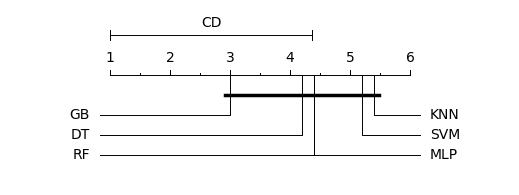

In [58]:
# Drawing the Neimanyi Diagram
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from Orange.evaluation import graph_ranks

values = rankAvg.values
methods = rankAvg.index
graph_ranks(values,methods,cd=Critical_difference,width = 5,textspace = 1)
plt.show()